In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Importing the data.

one0 = pd.read_excel('../data/processed/one/one 0.xlsx')
one1 = pd.read_excel('../data/processed/one/one 1.xlsx')
one2 = pd.read_excel('../data/processed/one/one 2.xlsx')
cnss = pd.read_excel('../data/processed/cnss/cnss 0.xlsx')
one3 = pd.read_excel('../data/raw/pending/cápitas-régimen-contributivo-sfs-afiliado-mes-dispersión-2012-2023.xlsx')
poverty_rate = pd.read_excel('../data/raw/pending/indice de pobreza.xlsx')
poverty_rate.columns = [column.lower() for column in poverty_rate.columns]

# Exploration

In [23]:
def calculate_pct(numerator: int | pd.Series | list, denominator: int | pd.Series | list) -> int | pd.Series | list:
    return round((numerator/denominator) * 100, 2)

In [55]:
print(one0.columns)
one0

Index(['Unnamed: 0', 'año', 'afiliados (total)', 'afiliados (subsidiado)',
       'afiliados (contributivo)', 'numero de cápitas pagadas (total)',
       'numero de cápitas pagadas (subsidiado)',
       'numero de cápitas pagadas (contributivo)',
       'número de cápitas /afiliado (total)',
       'número de cápitas /afiliado (subsidiado)',
       'número de cápitas /afiliado (contributivo)'],
      dtype='object')


,Unnamed: 0,año,afiliados (total),afiliados (subsidiado),afiliados (contributivo),numero de cápitas pagadas (total),numero de cápitas pagadas (subsidiado),numero de cápitas pagadas (contributivo),número de cápitas /afiliado (total),número de cápitas /afiliado (subsidiado),número de cápitas /afiliado (contributivo)
0,1,2005,253374,253374,0,266531,266531,0,1.051927,1.051927,0.000000
1,2,2006,514040,514040,0,513416,513416,0,0.998786,0.998786,0.000000
2,3,2007,2559117,1081936,1477181,2681403,1081936,1599467,1.047784,1.000000,1.082783
3,4,2008,2917157,1224898,1692259,2954314,1224643,1729671,1.012737,0.999792,1.022108
4,5,2009,3492524,1404225,2088299,3442398,1346166,2096232,0.985648,0.958654,1.003799
5,6,2010,4377869,2013786,2364083,4265825,1847833,2417992,0.974407,0.917592,1.022803
6,7,2011,4520850,2003427,2517423,4583278,1996335,2586943,1.013809,0.996460,1.027616
7,8,2012,4991762,2303351,2688411,5042091,2294356,2747735,1.010082,0.996095,1.022067
8,9,2013,5611059,2751753,2859306,5612213,2646899,2965314,1.000206,0.961896,1.037075
9,10,2014,6157245,3015646,3141599,6240593,3015646,3224947,1.013537,1.000000,1.026530


# Primer dataset

Mayor porcentaje de crecimiento 80.0


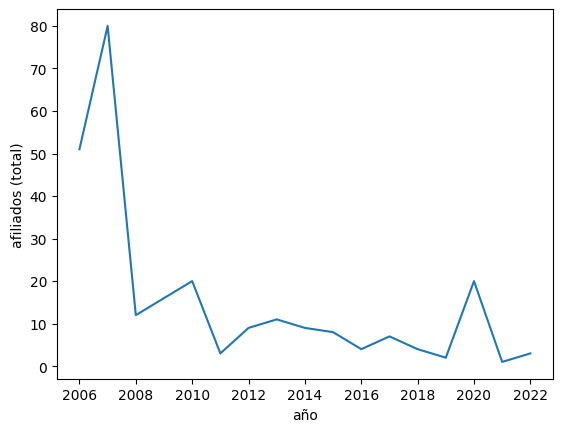

In [ ]:
# Calculating the growth percentage with respect of the previous year.
pct_growth = round((one0['afiliados (total)'].diff()[1:] / one0['afiliados (total)'][:-1]) * 100)

# Plotting a line chart.
sns.lineplot(
    y=pct_growth,
    x=one0['año']
)

print('Mayor porcentaje de crecimiento', pct_growth.max())

9.0


<Axes: xlabel='afiliados (total)', ylabel='Count'>

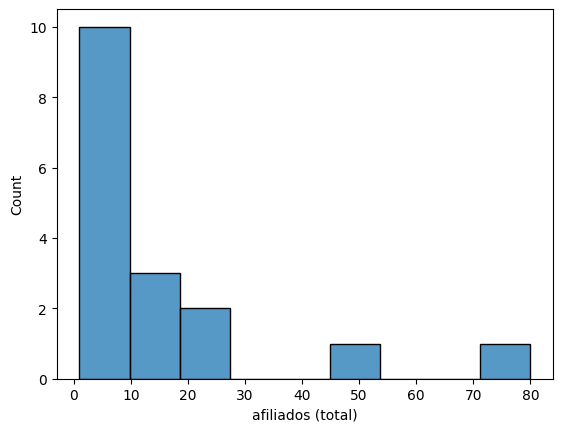

In [42]:
print(pct_growth.median())

sns.histplot(pct_growth)

Mean51.76, std: 16.99753095245107


<Axes: ylabel='Count'>

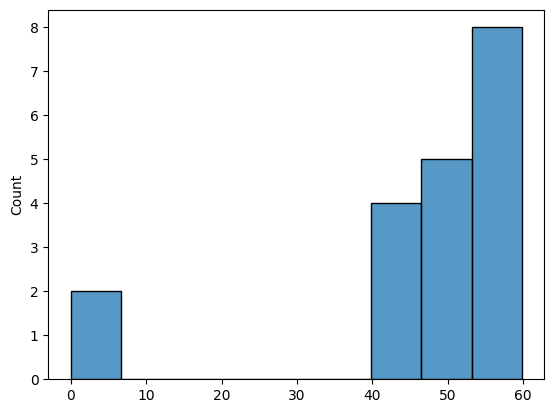

In [57]:
contributed = calculate_pct(one0['afiliados (contributivo)'], one0['afiliados (total)'])

print(f'Mean{contributed.median()}, std: {contributed.std()}')
sns.histplot(contributed)

Mean48.24, std: 16.99753095245107


<Axes: ylabel='Count'>

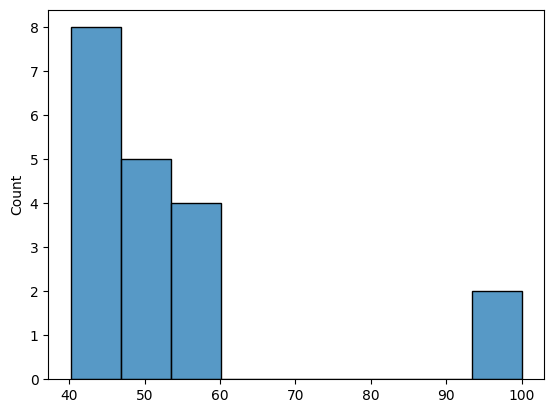

In [58]:
subsidiado = calculate_pct(one0['afiliados (subsidiado)'], one0['afiliados (total)'])

print(f'Mean{subsidiado.median()}, std: {subsidiado.std()}')
sns.histplot(subsidiado)

<Axes: xlabel='año', ylabel='None'>

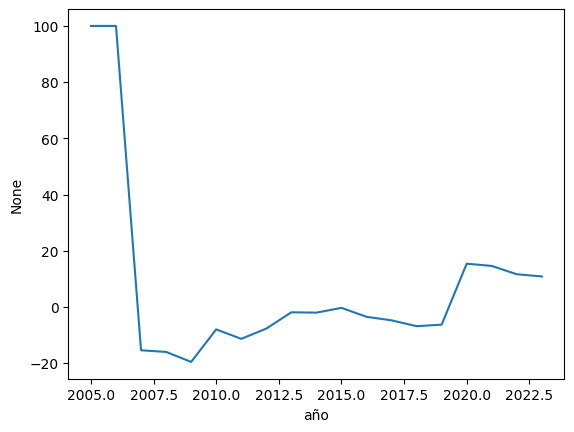

In [28]:
sns.lineplot(
    y=subsidy - contributed,
    x=one0['año'] 
)

Mean45.85, std: 26.209271807033687


<Axes: ylabel='Count'>

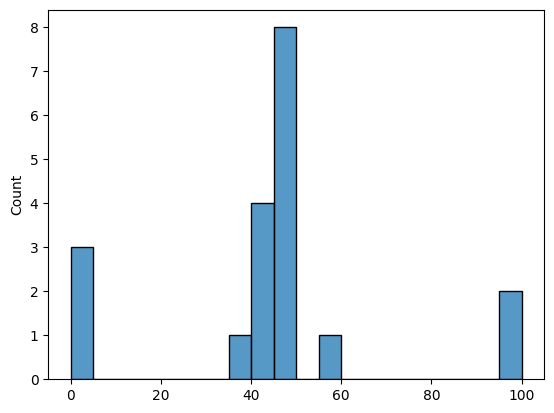

In [29]:
subsidy = calculate_pct(one0['numero de cápitas pagadas (subsidiado)'], one0['numero de cápitas pagadas (total)'])

print(f'Mean{subsidy.median()}, std: {subsidy.std()}')
sns.histplot(subsidy)

Mean54.15, std: 26.209271807033687


<Axes: ylabel='Count'>

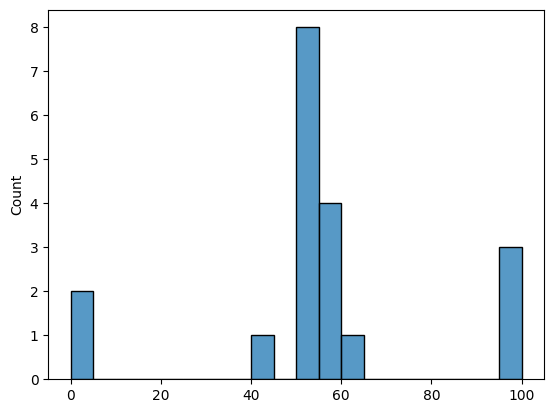

In [30]:
contributed = calculate_pct(one0['numero de cápitas pagadas (contributivo)'], one0['numero de cápitas pagadas (total)'])

print(f'Mean{contributed.median()}, std: {contributed.std()}')
sns.histplot(contributed)

<Axes: xlabel='año', ylabel='None'>

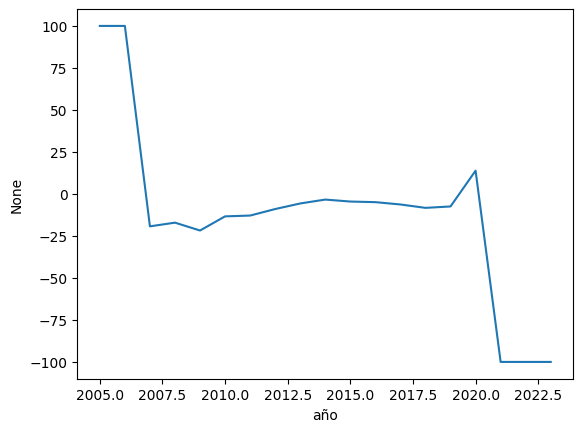

In [31]:
sns.lineplot(
    y=subsidy - contributed,
    x=one0['año'] 
)

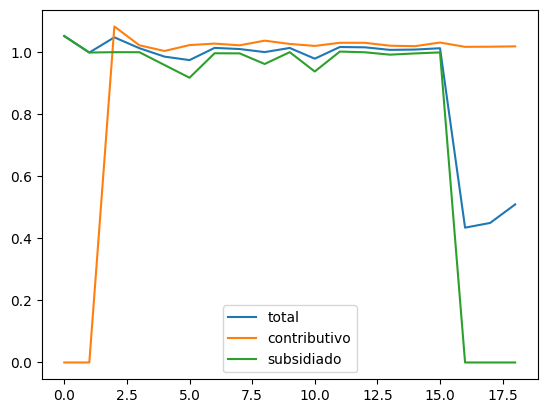

In [32]:
fig, ax = plt.subplots()

ax.plot(one0['número de cápitas /afiliado (total)'])
ax.plot(one0['número de cápitas /afiliado (contributivo)'])
ax.plot(one0['número de cápitas /afiliado (subsidiado)'])

plt.legend(['total', 'contributivo', 'subsidiado',])

In [33]:
poverty_rate_general = poverty_rate.loc[poverty_rate['condición de pobreza'].str.strip() == 'General'].drop(columns=['condición de pobreza'])

<Axes: >

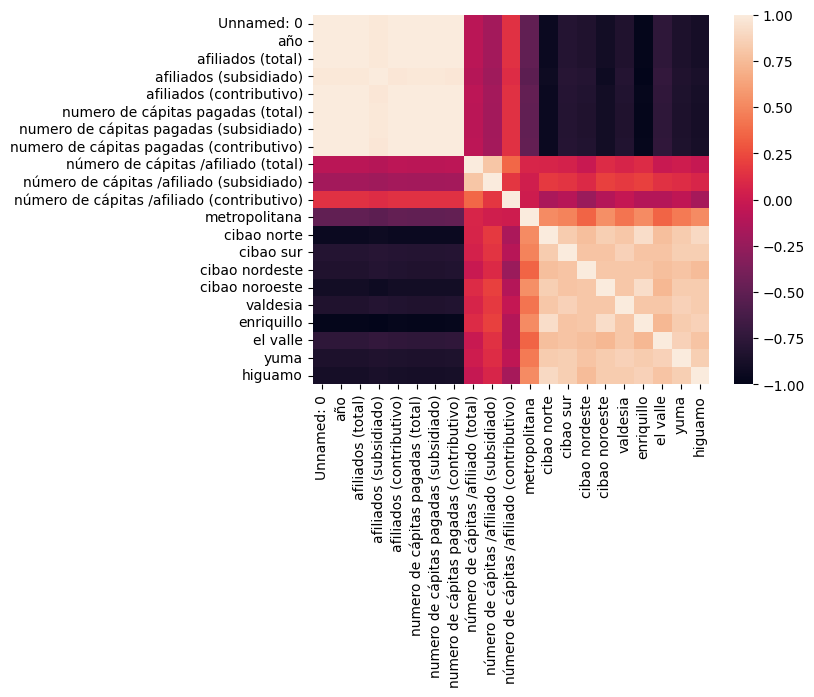

In [34]:
sns.heatmap(pd.merge(one0, poverty_rate_general, on='año').corr(method='kendall'))

# Second Data set

In [35]:
print(one1.columns)
one1

Index(['Unnamed: 0', 'año', 'total  (total )', 'total  (hombres)',
       'total  (mujeres)', 'régimen subsidiado (total )',
       'régimen subsidiado (hombres )', 'régimen subsidiado (mujeres )',
       'régimen contributivo (total )', 'régimen contributivo (hombres )',
       'régimen contributivo (mujeres )'],
      dtype='object')


,Unnamed: 0,año,total (total ),total (hombres),total (mujeres),régimen subsidiado (total ),régimen subsidiado (hombres ),régimen subsidiado (mujeres ),régimen contributivo (total ),régimen contributivo (hombres ),régimen contributivo (mujeres )
0,1,2007,2559117,1272227,1286890,1081936,479821,602115,1477181,792406,684775
1,2,2008,2916902,1435763,1481139,1224643,545438,679205,1692259,890325,801934
2,3,2009,3492524,1694440,1798084,1404225,615631,788594,2088299,1078809,1009490
3,4,2010,4377869,2114762,2263107,2013786,904636,1109150,2364083,1210126,1153957
4,5,2011,4520850,2178591,2342259,2003427,899174,1104253,2517423,1279417,1238006
5,6,2012,4991762,2392155,2599607,2303351,1031367,1271984,2688411,1360788,1327623
6,7,2013,5652729,2705832,2946897,2751753,1243431,1508322,2900976,1462401,1438575
7,8,2014,6157245,2978843,3178402,3015646,1400518,1615128,3141599,1578325,1563274
8,9,2015,6657243,3247604,3409639,3317405,1572793,1744612,3339838,1674811,1665027
9,10,2016,6938356,3384848,3553508,3347068,1575598,1771470,3591288,1809250,1782038


Mean48.83, std: 0.6792264198422824


<Axes: ylabel='Count'>

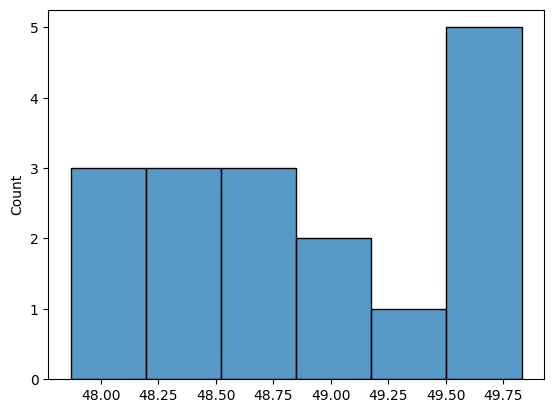

In [36]:
mans = calculate_pct( one1['total  (hombres)'], one1['total  (total )'])
print(f'Mean{mans.median()}, std: {mans.std()}')
sns.histplot(mans)

Mean51.17, std: 0.6792264198422824


<Axes: ylabel='Count'>

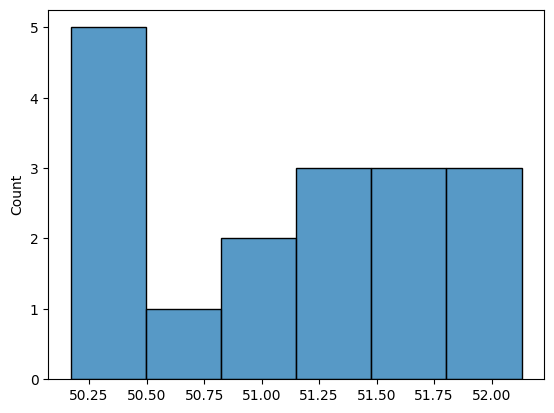

In [21]:
womans = calculate_pct( one1['total  (mujeres)'], one1['total  (total )'])
print(f'Mean{womans.median()}, std: {womans.std()}')
sns.histplot(womans)

Mean52.93, std: 2.069286606254321


<Axes: ylabel='Count'>

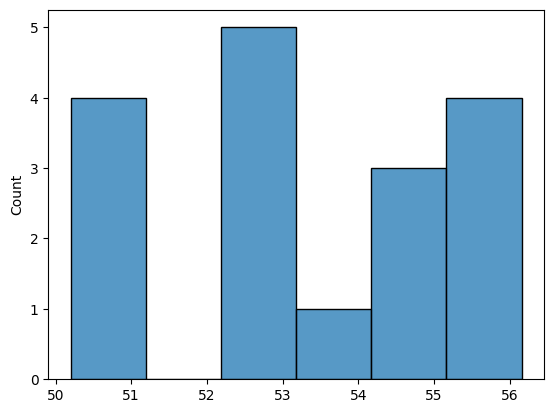

In [61]:
womans = calculate_pct( one1['régimen subsidiado (mujeres )'], one1['régimen subsidiado (total )'])
print(f'Mean{womans.median()}, std: {womans.std()}')
sns.histplot(womans)

Mean49.59, std: 1.0205833827652058


<Axes: ylabel='Count'>

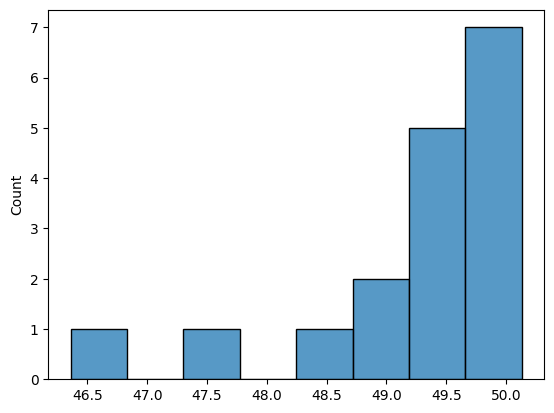

In [62]:
womans = calculate_pct( one1['régimen contributivo (mujeres )'], one1['régimen contributivo (total )'])
print(f'Mean{womans.median()}, std: {womans.std()}')
sns.histplot(womans)

# Third data set.

In [68]:
# Calculating the percentages.
for column in ['dependientes directos', 'titulares', 'dependientes adicionales']:
    one2[f'total de monto dispersado RD$ ({column}) %'] = round((one2[f'total de monto dispersado RD$ ({column})']/
        one2['total de monto dispersado RD$ (Total)']) * 100, 2)

In [69]:
one2

,año,meses,número de cápitas dispersadas(total),número de cápitas dispersadas (titulares),número de cápitas dispersadas (dependientes directos),número de cápitas dispersadas (dependientes adicionales),total de monto dispersado RD$ (Total),total de monto dispersado RD$ (titulares),total de monto dispersado RD$ (dependientes directos),total de monto dispersado RD$ (dependientes adicionales),total de monto dispersado RD$ (dependientes directos) %,total de monto dispersado RD$ (titulares) %,total de monto dispersado RD$ (dependientes adicionales) %
0,2012,Enero,2521387,1187667,1236485,97235,2.052281e+09,9.687468e+08,1.005793e+09,7.774136e+07,49.01,47.20,3.79
1,2012,Febrero,2536789,1190787,1247260,98742,2.059816e+09,9.698856e+08,1.010844e+09,7.908668e+07,49.07,47.09,3.84
2,2012,Marzo,2574224,1205800,1266851,101573,2.074433e+09,9.730217e+08,1.020569e+09,8.084205e+07,49.20,46.91,3.90
3,2012,Abril,2588831,1211245,1274320,103266,2.093551e+09,9.809415e+08,1.030160e+09,8.244997e+07,49.21,46.86,3.94
4,2012,Mayo,2604319,1214917,1284028,105374,2.103685e+09,9.829996e+08,1.036667e+09,8.401766e+07,49.28,46.73,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2023,Agosto,4643328,2124770,2267364,251194,7.220555e+09,3.304143e+09,3.525775e+09,3.906368e+08,48.83,45.76,5.41
140,2023,Septiembre,4652645,2126042,2274513,252090,7.235013e+09,3.306088e+09,3.536896e+09,3.920298e+08,48.89,45.70,5.42
141,2023,Octubre,4672810,2134779,2286062,251969,7.266053e+09,3.319645e+09,3.554565e+09,3.918432e+08,48.92,45.69,5.39
142,2023,Noviembre,4664027,2133179,2277973,252875,7.252740e+09,3.317232e+09,3.542254e+09,3.932538e+08,48.84,45.74,5.42


Mean49.79, std: 0.4463090451601488


<Axes: xlabel='total de monto dispersado RD$ (dependientes directos) %', ylabel='Count'>

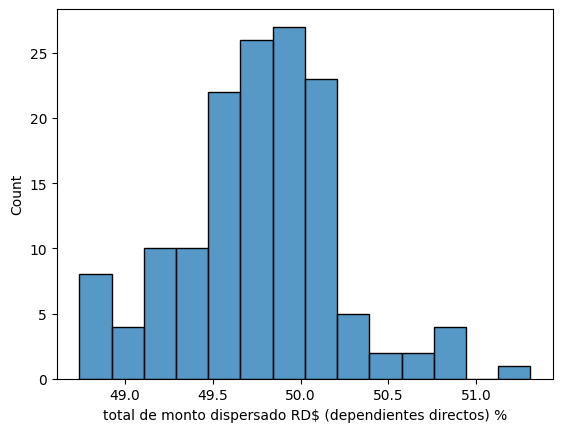

In [71]:
print(f"Mean{one2['total de monto dispersado RD$ (dependientes directos) %'].median()}, std: {one2['total de monto dispersado RD$ (dependientes directos) %'].std()}")
sns.histplot(one2['total de monto dispersado RD$ (dependientes directos) %'])

Mean5.18, std: 0.43740093783573486


<Axes: xlabel='total de monto dispersado RD$ (dependientes adicionales) %', ylabel='Count'>

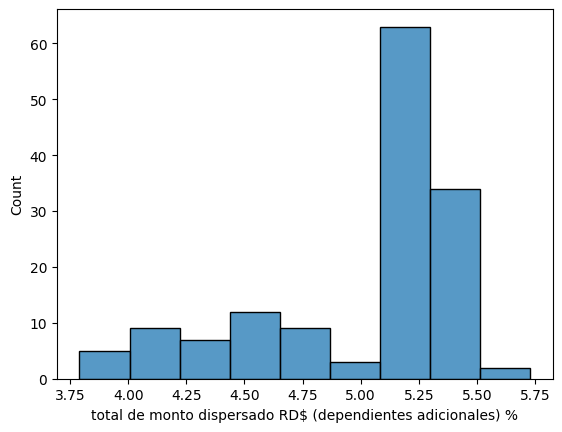

In [ ]:
print(f"Mean{one2['total de monto dispersado RD$ (dependientes adicionales) %'].median()}, std: {one2['total de monto dispersado RD$ (dependientes adicionales) %'].std()}")
sns.histplot(one2['total de monto dispersado RD$ (dependientes adicionales) %'])

Mean45.17, std: 0.6396090583119874


<Axes: xlabel='total de monto dispersado RD$ (titulares) %', ylabel='Count'>

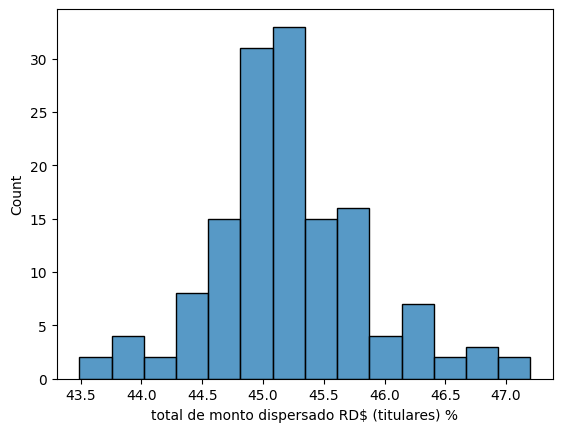

In [73]:
print(f"Mean{one2['total de monto dispersado RD$ (titulares) %'].median()}, std: {one2['total de monto dispersado RD$ (titulares) %'].std()}")
sns.histplot(one2['total de monto dispersado RD$ (titulares) %'])

In [77]:
one2['total de monto dispersado RD$ (Total)'].median()

np.float64(4059551820.885)